# Binary Classification


# Assignment


**Background:** Imagine that you are an admissions officer for a highly
sought-after graduate program. As part of a new initiative to streamline
the admissions process, a function -- whose precise specifications are
known only to the administration -- has been developed to evaluate each
application with respect to some criteria. A composite metric known as
'fit' is computed for each individual candidate; those scoring *greater
than or equal to 70* are extended an admissions offer.

**Objective:** In the absence of a clear-cut function with which to
assign 'fit' scores, learn a classification rule by assembling and
training classification models on historical admissions data. Thus the
target here is to predict the "chance of admit > .7" from the other columns.

------------------------------------------------------------------------

Note: For reproducible results, include `random_state=42` as a parameter
to Sklearn functions.

1.  -   Examine the structure and format of the data. 
            - Is it suitable for logistic regression? 
            - How do the features relate to one another?
            - If necessary, encode the target variable based 
              on the threshold of 70% in other words chance of admit .7

    -   Apply PCA to the input dimensions (excluding the target) and 
        select the first two principal components that *account for 80% 
        of the variance. 
        - Scatter plot the data in the first two PCA dimensions. Color the dots
          so we can see chance of admit.
        - We should only performing dimensionality reduction merely for the sake of
          visualization -- in this instance. Below we will note the adverse effect it would
          have on the model's overall performance if we used only the first two PCA components
          in the classification.

    -   Split the data into a training and testing set. The testing set
        should be one fifth the size of the training set.


1. You will run and evaluate the following classification models on the data

    **(1)** *logistic regression*
    
    **(2)** *linear support vector classification*
    
    **(3)** *k-nearest neighbors classification*
    
    **(4)** *decision tree classification*

    -   Train and test your classifiers using the previously reduced
        data. For each model, plot the classification probability.

    -   Manually tune your models' hyperparameters so that each achieves
        a *Cohen's kappa statistic* greater than 0.65. Note that this function
        can be fount in
        
            sklearn.metrics.cohen_kappa_score
        
        here you will compare the test 'y' ground truth labels to the model
        predictions.

        -   For logistic regression and support vector classification,
            adjust the inverse regularization parameter `C` and observe
            how the probability threshold reacts. Considering the ratio
            between accepted and rejected applicants, adjust the
            `class_weight` parameter accordingly. Use a range of values plot
            the score. 

        -   For k-nearest neighbors classification, consider adjusting
            the `n_neighbors` parameter. Generally, the empirically
            optimal K is found using an optimization heuristic -- in
            this case, adjust the parameter manually and observe any
            changes.

    -   Compute the *accuracy* score for each classifier. Why might this
        be a misleading performance metric?

    -   Shuffle your data set. If at all, how does this affect your
        results? Try a different train, test split (different random seed). How much
        does this matter?
        
    -   Do decision trees differ between runs? Try three or for different runs with different randomizations and
        see how results differ. See both how accuracy differs and the trees differ. For
        interpretability, use the PyDotPlus package to visualize your decision trees.


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
Adm=pd.read_csv('Admission_Predict.csv')

In [77]:
Adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#drop the serial no
df=Adm.drop(['Serial No.'],axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# PCA

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
features=['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research',] # emit lor
X=df.loc[:,features].values
y=df.loc[:,['Chance of Admit ']].values

In [83]:
X=StandardScaler().fit_transform(X)
pd.DataFrame(data=X,columns=features).head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.653029,-1.099975


In [84]:
pca=PCA(n_components=2)

In [85]:
principal_components=pca.fit_transform(X)
print(df.shape)
print(principal_components.shape)

(400, 8)
(400, 2)


In [86]:
principal_2d=pd.DataFrame(data=principal_components,columns=['Principal components_1','Principal components_2'])

In [87]:
principal_2d.head()

,Principal components_1,Principal components_2
0,-3.356282,0.077177
1,-1.298936,0.416466
2,0.621459,1.103779
3,-0.732042,0.795673
4,2.004276,-0.159440


In [ ]:
result=np.where(df['Chance of Admit ']>0.7,1,0)

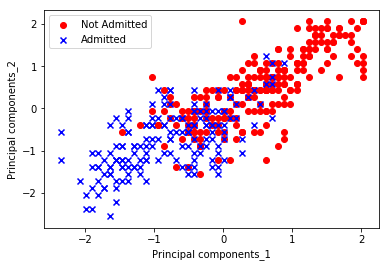

In [92]:
admit = np.where(result == 1)
not_admit = np.where(result == 0)
plt.scatter(X[admit, 0], X[admit, 1], marker='o', c='r')
plt.scatter(X[not_admit, 0], X[not_admit, 1], marker='x', c='b')
plt.xlabel('Principal components_1')
plt.ylabel('Principal components_2')
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

In [93]:
#target=np.where(df['Chance of Admit ']>0.7,1,0)
#df1=pd.DataFrame(target)
df1=pd.DataFrame(result)

In [95]:
df_dummy = pd.get_dummies(df1 )
df_dummy.head()

,0
0,1
1,1
2,1
3,1
4,0


In [96]:
final = pd.concat([principal_2d, df_dummy], axis = 1)
final.columns=['principal component_1','principal component_2','result']
final.head(5)

,principal component_1,principal component_2,result
0,-3.356282,0.077177,1
1,-1.298936,0.416466,1
2,0.621459,1.103779,1
3,-0.732042,0.795673,1
4,2.004276,-0.159440,0


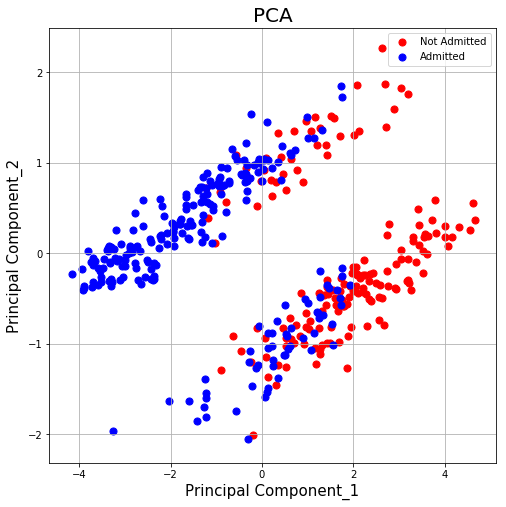

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component_1', fontsize = 15)
ax.set_ylabel('Principal Component_2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)


result = [0,1]
colors = ['r','b']
for result, color in zip(result,colors):
    indicesToKeep = final['result'] == result
    ax.scatter(final.loc[indicesToKeep, 'principal component_1']
               , final.loc[indicesToKeep, 'principal component_2']
               , c = color
               , s = 50)
ax.legend(['Not Admitted', 'Admitted'])
ax.grid()

In [98]:
pca.explained_variance_ratio_

array([0.71870228, 0.1092336 ])

# Logistic Regression

In [163]:
features=['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research',] # emit lor
#X=df.loc[:,features].values
X = df.drop(columns=['Chance of Admit '], axis=1)
y=final['result']
theta = np.zeros((X.shape[1],1))

In [164]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\sonali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
y_pred = LogReg.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[24,  9],
       [ 9, 38]], dtype=int64)

In this confusion matrix 24 and 38 are the number of correct predictions. 9 and 9 are the number of incorrect predictions.

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        33
           1       0.81      0.81      0.81        47

   micro avg       0.78      0.78      0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



# linear support vector classification

In [106]:
X = df.drop(columns=['Chance of Admit '], axis=1)
y=final['result']

In [107]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [108]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [109]:
y_pred = svclassifier.predict(X_test)  

In [110]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[23  4]
 [10 43]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        27
           1       0.91      0.81      0.86        53

   micro avg       0.82      0.82      0.82        80
   macro avg       0.81      0.83      0.81        80
weighted avg       0.84      0.82      0.83        80



# k-nearest neighbors classification


In [111]:
from sklearn.neighbors import KNeighborsClassifier 

In [112]:
X = df.drop(columns=['Chance of Admit '], axis=1)
y=final['result'].values
print(x.shape)
y.shape

(400, 2)


(400,)

In [113]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [115]:
knn.predict(X_test)[0:8]

array([0, 1, 1, 1, 0, 0, 1, 1])

In [116]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.75

In [117]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.825  0.675  0.825  0.75   0.8125]
0.7775000000000001


# decision tree classification

In [118]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn import metrics

In [119]:
features=[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

In [120]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [121]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7375


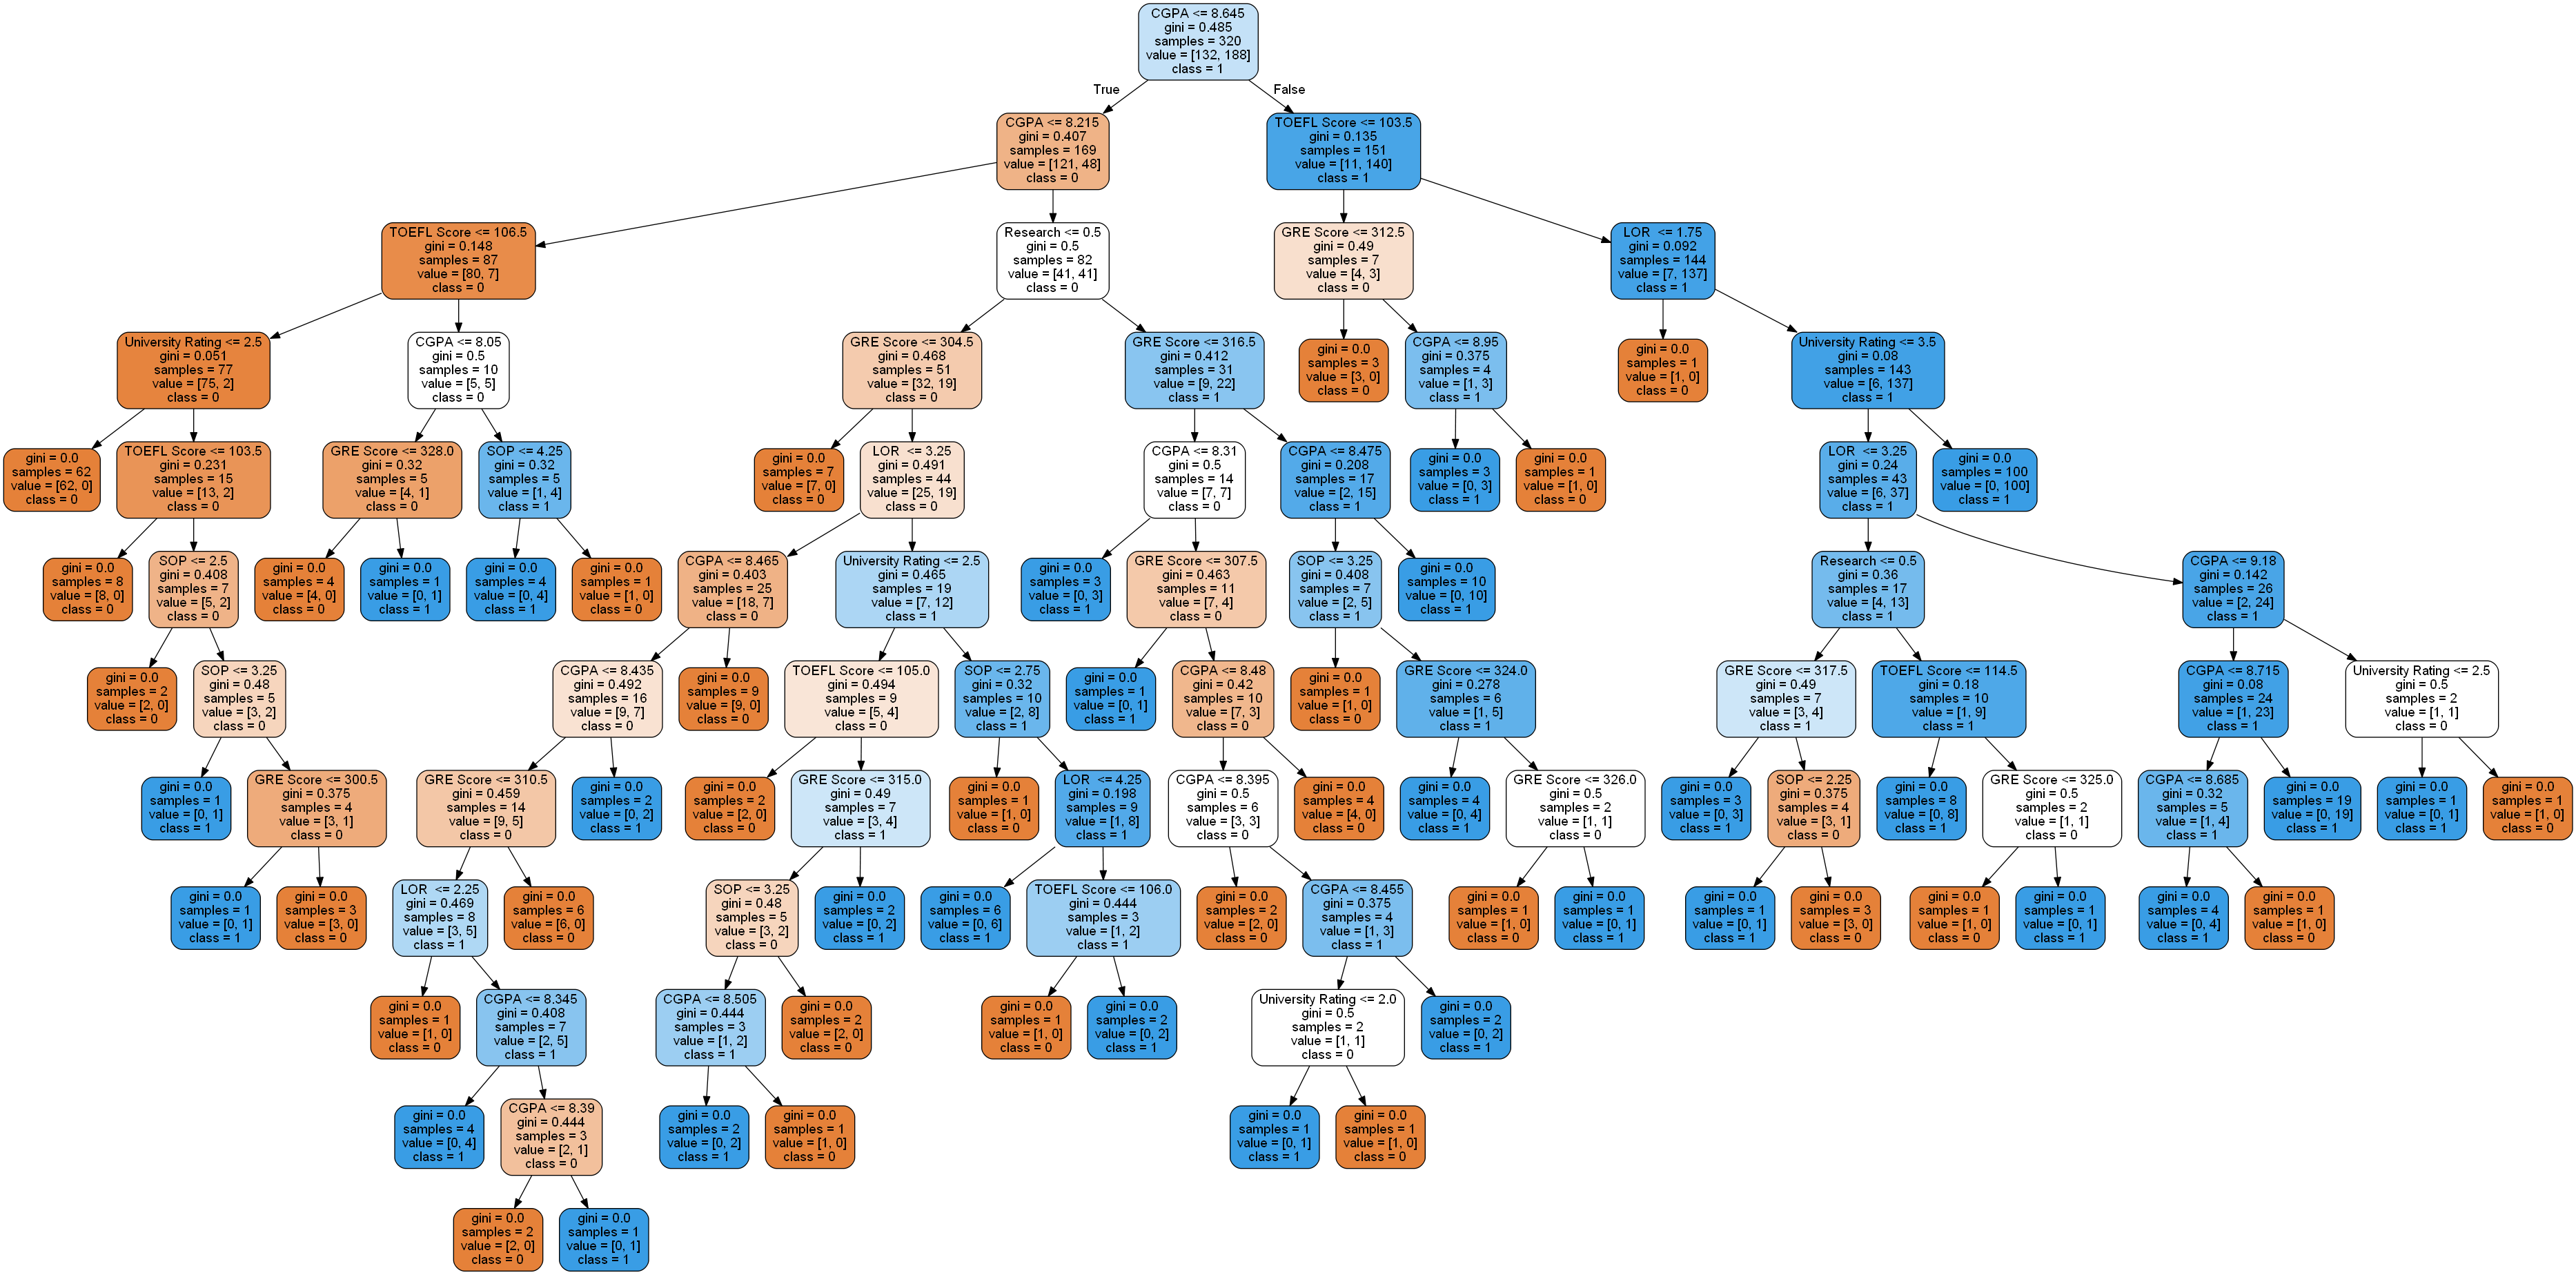

In [57]:
dot_data = export_graphviz(clf,
                           filled=True, 
                           rounded=True,
                           class_names=['0','1'],
                           feature_names=features,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('clf.png')
Image(graph.create_png())

In [ ]:
# now on depth=3

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Accuracy,
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.825


the classification rate increased to 82.5%, which is better accuracy than the previous model.

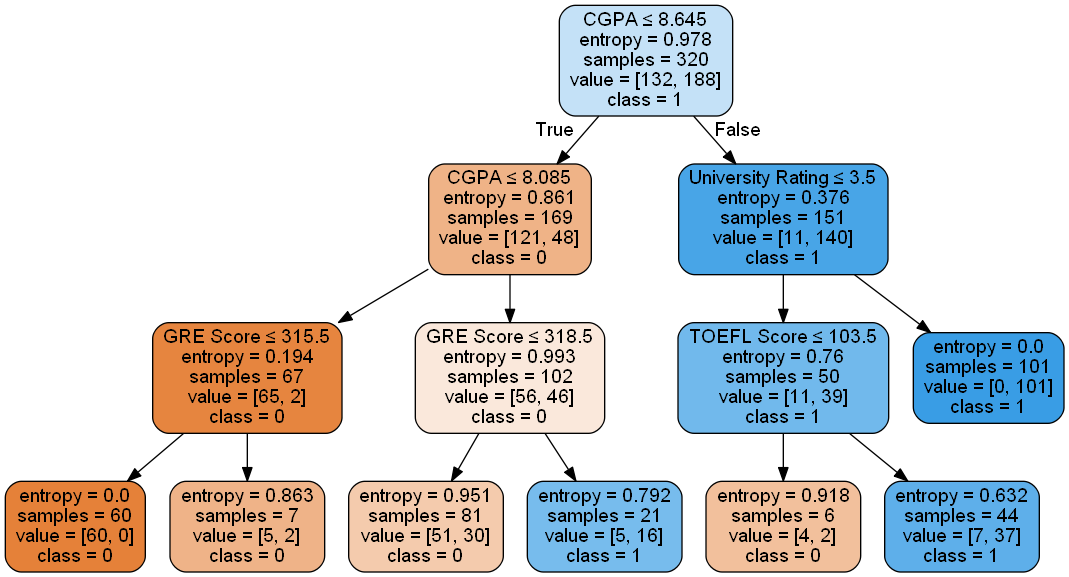

In [59]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('clf.png')
Image(graph.create_png())